In [1]:
from rdkit import Chem
import sys
import os
import useful_rdkit_utils as uru
from rdkit.Chem.Draw import MolsToGridImage
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem import Descriptors
import matplotlib.pyplot as plt
import itertools
import pandas as pd
from collections import Counter
import mols2grid
from tdc.single_pred import ADME
from Filtering_functions import filter_molecules
import glob
import molvs
from multiprocessing import Pool, cpu_count
from tqdm.auto import tqdm

In [2]:
# Get the current working directory
current_dir = os.getcwd()
print(current_dir)
# Get the parent directory
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
print(parent_dir)
# Add the parent directory to sys.path
sys.path.append(parent_dir)

/home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/data/three_proteins/7wf5/3dsbdd
/home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/data/three_proteins/7wf5


Reading data from crossdock dataset, add a standardization for small molecule data:

In [3]:
standardizer = molvs.standardize.Standardizer()

def standardize_mol(mol):
    try:
        mol = standardizer.standardize(mol)
        mol = standardizer.fragment_parent(mol, skip_standardize=True)
        mol = standardizer.tautomer_parent(mol, skip_standardize=True)
        mol = standardizer.isotope_parent(mol, skip_standardize=True)
        mol = standardizer.charge_parent(mol, skip_standardize=True)
        return mol
    except:
        return None

In [5]:
smi_list = []
with open('/home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/data/three_proteins/7wf5/3dsbdd/500_generated.smi') as f:
    for smi in f:
        smi_list.append(smi.strip())
standardized_smiles_list = []
for smi in tqdm(smi_list, desc="Standardizing molecules", unit="mol"):
    mol = Chem.MolFromSmiles(smi)
    mol = standardize_mol(mol)
    
    if mol:
        standardized_smiles_list.append(Chem.MolToSmiles(mol))
    else:
        print(f"Skipping molecule {smi}")
        pass

print(len(smi_list))
len(standardized_smiles_list)

Standardizing molecules:   0%|          | 0/502 [00:00<?, ?mol/s]

[15:26:43] Can't kekulize mol.  Unkekulized atoms: 2 3 5 6 7 8 9 10 22


Skipping molecule COc1c(N)nc2cccc(NC(=O)Nc3ccc(F)cc3)c12


[15:26:45] Explicit valence for atom # 1 N, 4, is greater than permitted
[15:26:45] Explicit valence for atom # 1 N, 4, is greater than permitted


Skipping molecule CN1(NCC2OC23CC=C(NC(=O)Nc2ccccc2)C2=C3N3CC3C2=O)CC1=O
Skipping molecule CN1(NC2=C3OC34CC=C(NC(=O)Nc3ccccc3)C3=C4N4(C2)CC4C3=O)CC1=O


[15:27:40] Explicit valence for atom # 5 N, 4, is greater than permitted


Skipping molecule COC1C2CN21CC1CN1C(CC1NC12CC1=CC=CC(C(=O)NC3CN(C(F)F)c4cc5c(cc43)N(CCCO)C3(CC3)N5C)C1(N)N2)n1c2[nH]c1=2


[15:27:42] Explicit valence for atom # 18 N, 4, is greater than permitted


Skipping molecule O=C(NC12OC1C(C(F)(F)F)Oc1cc(N3C4CN56CC(O)CC5C6C43)ccc12)c1cccc2c1N1CC1(c1ccnc(CCC=C3CCCO3)n1)C2


[15:27:57] Explicit valence for atom # 5 N, 4, is greater than permitted


Skipping molecule C=C1C(C2CN23COCC3C)N1C(CCC1C=c2cccc(C(=O)NC3CN(C(F)F)c4cc5c(cc43)N(CCC(C)O)C3(CC3)N5C)c2=NN1)NC1=NC1


[15:27:57] Explicit valence for atom # 37 N, 4, is greater than permitted


Skipping molecule CC1N(C)c2cc3c(cc2N1CC=CC1CN1)C(NC(=O)C1C=CC=C2C=C(C4C=C(N5C6CCC7CN78CC8C65)N=CNC(N)N4)NC21N)CN3C(F)F


[15:28:11] Explicit valence for atom # 45 N, 4, is greater than permitted


Skipping molecule CN1C2CCC3C(C21)N3c1ccc2c3c1N3C1CCC(CC2NC(=O)c2cccc(CN3CC=C4N=CN5CC=NC(=O)C(CN6(C)CC=CC=N6)N5C4=N3)c2)OC1


[15:28:46] Explicit valence for atom # 69 N, 4, is greater than permitted
[15:28:46] Explicit valence for atom # 3 N, 4, is greater than permitted
[15:28:46] Explicit valence for atom # 3 N, 4, is greater than permitted
[15:28:46] Explicit valence for atom # 57 N, 4, is greater than permitted
[15:28:46] Explicit valence for atom # 70 N, 4, is greater than permitted
[15:28:46] Explicit valence for atom # 70 N, 4, is greater than permitted


Skipping molecule CC1C2C3N=C(C45Cc6cccc(C(=O)NC78OC7C(C(F)(F)F)Oc7cc(N9C%10CN(C)CC%109)ccc78)c6N4C5)C=CN3C3C(NCC4NCCN5CC(NC6OCC7OCCC(N)N76)=NCC45)N123
Skipping molecule CC1CN23CC(C=CCN4CNC5=C(C4)O5)=NC2C3C(CNC2C3N4C=CC(C56Cc7cccc(C(=O)NC89OC8C(C(F)(F)F)Oc8cc(N%10C%11CN(C)CC%11%10)ccc89)c7N5C6)=NC4C4C(C)N243)N1
Skipping molecule CC1CN23CC(C=CCC=CNC(C)NC=N)NC2C3C(CNC2C3N4C=CC(C56Cc7cccc(C(=O)NC89OC8C(C(F)(F)F)Oc8cc(N%10C%11CN(C)CC%11%10)ccc89)c7N5C6)=NC4C4C(C)N243)N1
Skipping molecule COCCOC1C2C3N=C(C45Cc6cccc(C(=O)NC78OC7C(C(F)(F)F)Oc7cc(N9C%10CN(C)CC%109)ccc78)c6N4C5)C=CN3C3C(NCC4NC(C)CN56CC(C=CCNC(C)N)=NC5C46)N123
Skipping molecule CC1C2C3N=C(C45Cc6cccc(C(=O)NC78OC7C(C(F)(F)F)Oc7cc(N9C%10CN(C)CC%109)ccc78)c6N4C5)C=CN3C3C(NCC4NCCN5C4CN4C(NC6OCC7OCCC8(CN8)N76)C54)N123
Skipping molecule CC1C2C3N=C(C45Cc6cccc(C(=O)NC78OC7C(C(F)(F)F)Oc7cc(N9C%10CN(C)CC%109)ccc78)c6N4C5)C=CN3C3C(NCC4NCCN5CC(N6C7NC8CCOC9COC76N89)NCC45)N123


[15:28:58] Explicit valence for atom # 3 N, 4, is greater than permitted
[15:28:58] Explicit valence for atom # 56 N, 4, is greater than permitted
[15:28:58] Explicit valence for atom # 3 N, 4, is greater than permitted
[15:28:58] Explicit valence for atom # 3 N, 4, is greater than permitted
[15:28:58] Explicit valence for atom # 57 N, 4, is greater than permitted
[15:28:58] Explicit valence for atom # 59 N, 4, is greater than permitted
[15:28:58] Explicit valence for atom # 57 N, 4, is greater than permitted
[15:28:58] Explicit valence for atom # 72 N, 4, is greater than permitted
[15:28:58] Explicit valence for atom # 3 N, 4, is greater than permitted
[15:28:58] Explicit valence for atom # 57 N, 4, is greater than permitted
[15:28:58] Explicit valence for atom # 45 N, 4, is greater than permitted
[15:28:58] Explicit valence for atom # 60 N, 4, is greater than permitted
[15:28:58] Explicit valence for atom # 56 N, 4, is greater than permitted
[15:28:58] Explicit valence for atom # 59 

Skipping molecule CC1CN23CC(C=CCNC(N)=O)=NC2C3C(CNC2C3N4C5=C(O5)C(C56Cc7cccc(C(=O)NC89OC8C(C(F)(F)F)Oc8cc(N%10C%11CN(C)CC%11%10)c(F)cc89)c7N5C6)=NC4C4C(OCCO)N243)N1
Skipping molecule COCCC1C2C3N=C(C45Cc6cccc(C(=O)NC78OC7C(C(F)(F)F)Oc7cc(N9C%10CN(C)CC%109)ccc78)c6N4C5)C=CN3C3C(NCC4NC5CC5N56CC(C=CCN(C=N)C7C=C7)=NC5C46)N123
Skipping molecule C=C1CN23CC(C=CC=CC4=NNC56NC57C6N47)NC2C3C(CNC2C3N4C=CC(C56Cc7cccc(C(=O)NC89OC8C(C(F)(F)F)Oc8cc(N%10C%11CN(C)CC%11%10)ccc89)c7N5C6)=NC4C4C(C)N243)N1
Skipping molecule CC1CN23CC(C=CCN(C=N)C4C=C4)=NC2C3C(CNC2C3N4C=CC(C56Cc7cccc(C(=O)NC89OC8C(C(F)(F)F)Oc8cc(N%10C%11CN(C)CC%11%10)ccc89)c7N5C6)=NC4C4C(CCC5CO5)N243)N1
Skipping molecule COCC1OC12C1C3N=C(C45Cc6cccc(C(=O)NC78OC7C(C(F)(F)F)Oc7cc(N9C%10CN(C)CC%109)ccc78)c6N4C5)C=CN3C3C(NCC4NC(C)CN56CC(C=CCN(C=N)C7C=C7)=NC5C46)N312
Skipping molecule CC(=O)OCCC1C2C3N=C(C45Cc6cccc(C(=O)NC78OC7C(C(F)(F)F)Oc7cc(N9C%10CN(C)CC%109)ccc78)c6N4C5)C4=C(O4)N3C3C(NCC4NC(C)CN56CC(C=CCNC(N)=O)=NC5C46)N123
Skipping molecule COCC

[15:28:58] Explicit valence for atom # 3 N, 4, is greater than permitted
[15:28:58] Explicit valence for atom # 3 N, 4, is greater than permitted
[15:28:58] Explicit valence for atom # 59 N, 4, is greater than permitted
[15:28:58] Explicit valence for atom # 3 N, 4, is greater than permitted
[15:28:58] Explicit valence for atom # 57 N, 4, is greater than permitted
[15:28:58] Explicit valence for atom # 38 N, 4, is greater than permitted
[15:28:58] Explicit valence for atom # 58 N, 4, is greater than permitted
[15:28:58] Explicit valence for atom # 57 N, 4, is greater than permitted
[15:28:58] Explicit valence for atom # 3 N, 4, is greater than permitted
[15:28:58] Explicit valence for atom # 57 N, 4, is greater than permitted
[15:28:58] Explicit valence for atom # 3 N, 4, is greater than permitted
[15:28:58] Explicit valence for atom # 59 N, 4, is greater than permitted
[15:28:58] Explicit valence for atom # 3 N, 4, is greater than permitted
[15:28:58] Explicit valence for atom # 3 N, 

Skipping molecule CC1CN23CC(CC4C5C=CNCN54)=NC2C3C(CNC2C3N4C5=C(O5)C(C56Cc7cccc(C(=O)NC89OC8C(C(F)(F)F)Oc8cc(N%10C%11CN(C)CC%11%10)c(F)cc89)c7N5C6)=NC4C4C(CCC5CO5)N243)N1
Skipping molecule C=C1CN23CC(C=NC4C=CNCN4C4CO4)=NC2C3C(CNC2C3N4C=CC(C56Cc7cccc(C(=O)NC89OC8C(C(F)(F)F)Oc8cc(N%10C%11CN(C)CC%11%10)ccc89)c7N5C6)=NC4C4C5(OC5COC)N234)N1
Skipping molecule COCCOC1C2C3N=C(C45Cc6cccc(C(=O)NC78OC7C(C(F)(F)F)Oc7cc(N9C%10CN(C)CC%109)c(F)cc78)c6N4C5)C4=C(O4)N3C3C(NCC4NC5CC5N56CC(C=CCN7CC=CC7N)=NC5C46)N123
Skipping molecule C=C1CN23CC(C=NC4C=CNCN4C4CO4)=NC2C3C(CNC2C3N4C=CC(C56Cc7cccc(C(=O)NC89OC8C(C(F)(F)F)Oc8cc(N%10C%11CN(C)CC%11%10)ccc89)c7N5C6)=NC4C4C(CCC5CO5)N243)N1
Skipping molecule COCCOC1C2C3N=C(C45Cc6cccc(C(=O)NC78OC7C(C(F)(F)F)Oc7cc(N9C%10CN(C)CC%109)ccc78)c6N4C5)C=CN3C3C(NCC4NC(C)CN56CC(C=NC7C=CNCN7C7CO7)=NC5C46)N123
Skipping molecule CN1CC2C(C1)N2c1cc2c(cc1F)C1(NC(=O)c3cccc4c3N3CC3(C3=NC5C6C(C7COCCO7)N67C(NCC6NC8CC8N89CC(C=CCN(C=N)C%10C=C%10)=NC8C69)C7N5C5=C3O5)C4)OC1C(C(F)(F)F)O2
Skip

[15:29:00] Explicit valence for atom # 3 N, 4, is greater than permitted
[15:29:00] Explicit valence for atom # 38 N, 4, is greater than permitted
[15:29:00] Explicit valence for atom # 17 N, 4, is greater than permitted
[15:29:00] Explicit valence for atom # 59 N, 4, is greater than permitted


Skipping molecule C=C1CN23CC4=C(C=C(CC=CC5C=N5)NCN4)NC2C3C(CNC2C3N4C5=C(O5)C(C56Cc7cccc(C(=O)NC89OC8C(C(F)(F)F)Oc8cc(N%10C%11CN(C)CC%11%10)c(F)cc89)c7N5C6)=NC4C4C(C5CC6OC6CO5)N243)N1
Skipping molecule CN1CC2C(C1)N2c1cc2c(cc1F)C1(NC(=O)c3cccc4c3N3CC3(C3=NC5C6C(C7OC7C7CO7)N67C(NCC6NC8CC8N89CC(C=CCCC=CCCN(C)C%10%11CC%10N%11)NC8C69)C7N5C5=C3O5)C4)OC1C(C(F)(F)F)O2
Skipping molecule COC12CC1NC(N)(C=CCC=CCC=C1CN34CC(C)NC(CNC5C6N7C8=C(O8)C(C89Cc%10cccc(C(=O)NC%11%12OC%11C(C(F)(F)F)Oc%11cc(N%13C%14CN(C)CC%14%13)c(F)cc%11%12)c%10N8C9)=NC7C7C(OC8CC8)N576)C3C4N1)N2
Skipping molecule CC(=O)OCCC1C2C3N=C(C45Cc6cccc(C(=O)NC78OC7C(C(F)(F)F)Oc7cc(N9C%10CN(C)CC%109)ccc78)c6N4C5)C4=C(O4)N3C3C(NCC4NC(C)CN56CC(C=CC(CCn7cccc7)NC7(N)CC7)=NC5C46)N123
Skipping molecule CC(=O)OCCC1C2C3NC(C45Cc6cccc(C(=O)NC78OC7C(C(F)(F)F)Oc7cc(N9C%10CN(C)CC%109)ccc78)c6N4C5)COCN3C3C(NCC4NC(C)CN56CC(C=CC(CCn7cccc7)NC7(N)CC7)=NC5C46)N123
Skipping molecule CC(=O)OCCC1C2C3N=C(C45Cc6cccc(C(=O)NC78OC7C(C(F)(F)F)Oc7cc(N9C%10CN(C)CC%109

[15:29:00] Explicit valence for atom # 59 N, 4, is greater than permitted
[15:29:00] Explicit valence for atom # 60 N, 4, is greater than permitted
[15:29:00] Explicit valence for atom # 34 N, 4, is greater than permitted
[15:29:00] Explicit valence for atom # 38 N, 4, is greater than permitted
[15:29:00] Explicit valence for atom # 59 N, 4, is greater than permitted
[15:29:00] Explicit valence for atom # 59 N, 4, is greater than permitted
[15:29:00] Explicit valence for atom # 3 N, 4, is greater than permitted
[15:29:00] Explicit valence for atom # 57 N, 4, is greater than permitted
[15:29:00] Explicit valence for atom # 60 N, 4, is greater than permitted
[15:29:00] Explicit valence for atom # 3 N, 4, is greater than permitted
[15:29:00] Explicit valence for atom # 59 N, 4, is greater than permitted
[15:29:00] Explicit valence for atom # 57 N, 4, is greater than permitted
[15:29:00] Explicit valence for atom # 3 N, 4, is greater than permitted
[15:29:00] Explicit valence for atom # 3 

352

Set the default image size

In [6]:
with open('500_generated_standardized.smi', 'w') as f:
    for item in standardized_smiles_list:
        f.write("%s\n" % item)

In [7]:
uru.rd_set_image_size(300,300)

Convert SMILES and name of them to a dataframe

In [8]:
df = pd.DataFrame(standardized_smiles_list, columns=['SMILES'])
df

,SMILES
0,Cc1ccc(NC(=O)Nc2ccc(F)cc2)cc1
1,O=C(Nc1ccc(F)cc1)c1ccc(CF)cc1
2,Cc1ccc(NC(=O)Nc2ccc(F)cc2)c(C)c1
3,O=C(Nc1ccccc1)Nc1cccc2c1CCC2
4,Cc1ccc(NC(=O)Nc2cc(F)cc(F)c2)cc1
...,...
347,CC1C(CCCCCCCCCCCCCC(N)O)N1C(=O)C1CN2c3cc4c(cc3...
348,CC1C(CCCCCCCCCCCCCC(N)O)N1C(=O)C1CN2c3cc4c(cc3...
349,CC1C(CCCCCCCCCCCCCC(N)O)N1C(=O)C1CN2c3cc4c(cc3...
350,CC1OC1C1OC1CCC(O)CCCCCCCCCC1CC2C(CO1)N2C(=O)C1...


Remove repeated molecules

In [9]:
df = df.drop_duplicates(['SMILES'])
df.reset_index(inplace=True, drop=True)
df

,SMILES
0,Cc1ccc(NC(=O)Nc2ccc(F)cc2)cc1
1,O=C(Nc1ccc(F)cc1)c1ccc(CF)cc1
2,Cc1ccc(NC(=O)Nc2ccc(F)cc2)c(C)c1
3,O=C(Nc1ccccc1)Nc1cccc2c1CCC2
4,Cc1ccc(NC(=O)Nc2cc(F)cc(F)c2)cc1
...,...
345,CC1C(CCCCCCCCCCCCCC(N)O)N1C(=O)C1CN2c3cc4c(cc3...
346,CC1C(CCCCCCCCCCCCCC(N)O)N1C(=O)C1CN2c3cc4c(cc3...
347,CC1C(CCCCCCCCCCCCCC(N)O)N1C(=O)C1CN2c3cc4c(cc3...
348,CC1OC1C1OC1CCC(O)CCCCCCCCCC1CC2C(CO1)N2C(=O)C1...


Save the smi file for further use

Add an RDKit molecule to the dataframe

In [10]:
df['mol'] = df.SMILES.apply(Chem.MolFromSmiles)

Strip salts from the molecule

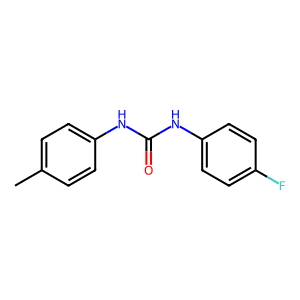

In [11]:
df.mol = df.mol.apply(uru.get_largest_fragment)
df.mol[0]

Instantiate a RingSystemFinder object and find ring systems for the molecules in df

In [12]:
ring_system_finder = uru.RingSystemFinder()
df['ring_sytems'] = df.mol.apply(ring_system_finder.find_ring_systems)
df.ring_sytems

0                                   [c1ccccc1, c1ccccc1]
1                                   [c1ccccc1, c1ccccc1]
2                                   [c1ccccc1, c1ccccc1]
3                            [c1ccccc1, c1ccc2c(c1)CCC2]
4                                   [c1ccccc1, c1ccccc1]
                             ...                        
345    [C1CN1, c1c2c(cc3c1NC14CC1OCCN34)CCN2, O=C1NC=...
346    [C1CN1, c1c2c(cc3c1NC14CC1OCCN34)CCN2, O=C1NC=...
347    [C1CN1, c1c2c(cc3c1NC14CC1OCCN34)CCN2, O=C1NC=...
348    [C1CO1, C1CO1, C1CC2NC2CO1, c1c2c(cc3c1NC14CC1...
349    [C1CN1, C1C2NC3N=C3N3CC3CN12, c1ccc2c(c1)CCN2,...
Name: ring_sytems, Length: 350, dtype: object

In [13]:
df.ring_sytems.values

array([list(['c1ccccc1', 'c1ccccc1']), list(['c1ccccc1', 'c1ccccc1']),
       list(['c1ccccc1', 'c1ccccc1']),
       list(['c1ccccc1', 'c1ccc2c(c1)CCC2']),
       list(['c1ccccc1', 'c1ccccc1']),
       list(['c1ccccc1', 'c1ccc2c(c1)CCN2']),
       list(['c1ccccc1', 'c1ccc2c(c1)CCC2']),
       list(['c1ccccc1', 'c1ccc2c(c1)CCO2']),
       list(['c1ccccc1', 'c1ccccc1']), list(['c1ccccc1', 'c1ccccc1']),
       list(['c1ccccc1', 'c1ccccc1']), list(['c1ccccc1', 'c1ccccc1']),
       list(['c1ccccc1', 'c1ccc2c(c1)CCCN2']),
       list(['c1ccc2c(c1)CCN2', 'c1ccccc1']),
       list(['c1ccc2c(c1)CCN2', 'c1ccccc1']),
       list(['c1ccccc1', 'c1ccc2c(c1)CCCN2']),
       list(['c1ccccc1', 'c1c2c3cc4c1n4Cn23']),
       list(['c1ccccc1', 'C1=Nc2ccccc2CC1']),
       list(['c1ccc2c(c1)OCO2', 'c1ccccc1']),
       list(['c1ccc2c(c1)CCC2', 'c1ccccc1']),
       list(['c1ccccc1', 'c1ccc2c(c1)CCC1CC21']),
       list(['c1ccc2c(c1)CCCN2', 'c1ccccc1']),
       list(['c1ccccc1', 'c1ccc2c(c1)CCCO2']),
       li

See how many times each ring system occurs

In [14]:
ring_system_list = list(itertools.chain.from_iterable(df.ring_sytems.values))
ring_count_df = pd.DataFrame(Counter(ring_system_list).items(),columns=["SMILES","Count"]) ### Convert a dictionary to a DataFrame.
ring_count_df.sort_values("Count",ascending=False,inplace=True)
ring_count_df

,SMILES,Count
0,c1ccccc1,235
14,C1CN1,130
70,C1CC2NC2C2NC12,119
71,C1=CC2=NC=NNC2=NN1,57
37,C1CO1,49
...,...,...
224,N1C2OC12,1
79,N=C1CC=CCN1,1
144,O=C1CCNCC2NC2N1,1
141,C1COCN1,1


View the ring system frequencies

In [15]:
mols2grid.display(ring_count_df,subset=["img","Count"])

MolGridWidget()

The RingSystemLookup object has a dictionary of how many times each ring system occurs in the ChEMBL database.  We can use this object to evaluate the molecules in df.

In [16]:
ring_system_lookup = uru.RingSystemLookup()
res = df.mol.apply(ring_system_lookup.process_mol)

In [17]:
res

0             [(c1ccccc1, 2568039), (c1ccccc1, 2568039)]
1             [(c1ccccc1, 2568039), (c1ccccc1, 2568039)]
2             [(c1ccccc1, 2568039), (c1ccccc1, 2568039)]
3        [(c1ccccc1, 2568039), (c1ccc2c(c1)CCC2, 10459)]
4             [(c1ccccc1, 2568039), (c1ccccc1, 2568039)]
                             ...                        
345    [(C1CN1, 1557), (c1c2c(cc3c1NC14CC1OCCN34)CCN2...
346    [(C1CN1, 1557), (c1c2c(cc3c1NC14CC1OCCN34)CCN2...
347    [(C1CN1, 1557), (c1c2c(cc3c1NC14CC1OCCN34)CCN2...
348    [(C1CO1, 3085), (C1CO1, 3085), (C1CC2NC2CO1, 6...
349    [(C1CN1, 1557), (C1C2NC3N=C3N3CC3CN12, 0), (c1...
Name: mol, Length: 350, dtype: object

In [18]:
df[['min_ring','min_freq']] = res.apply(uru.get_min_ring_frequency).tolist()
df

,SMILES,mol,ring_sytems,min_ring,min_freq
0,Cc1ccc(NC(=O)Nc2ccc(F)cc2)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472e260>,"[c1ccccc1, c1ccccc1]",c1ccccc1,2568039
1,O=C(Nc1ccc(F)cc1)c1ccc(CF)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472cd60>,"[c1ccccc1, c1ccccc1]",c1ccccc1,2568039
2,Cc1ccc(NC(=O)Nc2ccc(F)cc2)c(C)c1,<rdkit.Chem.rdchem.Mol object at 0x755af472ef80>,"[c1ccccc1, c1ccccc1]",c1ccccc1,2568039
3,O=C(Nc1ccccc1)Nc1cccc2c1CCC2,<rdkit.Chem.rdchem.Mol object at 0x755af472e110>,"[c1ccccc1, c1ccc2c(c1)CCC2]",c1ccc2c(c1)CCC2,10459
4,Cc1ccc(NC(=O)Nc2cc(F)cc(F)c2)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472e880>,"[c1ccccc1, c1ccccc1]",c1ccccc1,2568039
...,...,...,...,...,...
345,CC1C(CCCCCCCCCCCCCC(N)O)N1C(=O)C1CN2c3cc4c(cc3...,<rdkit.Chem.rdchem.Mol object at 0x755af42be880>,"[C1CN1, c1c2c(cc3c1NC14CC1OCCN34)CCN2, O=C1NC=...",c1c2c(cc3c1NC14CC1OCCN34)CCN2,0
346,CC1C(CCCCCCCCCCCCCC(N)O)N1C(=O)C1CN2c3cc4c(cc3...,<rdkit.Chem.rdchem.Mol object at 0x755af42be8f0>,"[C1CN1, c1c2c(cc3c1NC14CC1OCCN34)CCN2, O=C1NC=...",c1c2c(cc3c1NC14CC1OCCN34)CCN2,0
347,CC1C(CCCCCCCCCCCCCC(N)O)N1C(=O)C1CN2c3cc4c(cc3...,<rdkit.Chem.rdchem.Mol object at 0x755af42be960>,"[C1CN1, c1c2c(cc3c1NC14CC1OCCN34)CCN2, O=C1NC=...",c1c2c(cc3c1NC14CC1OCCN34)CCN2,0
348,CC1OC1C1OC1CCC(O)CCCCCCCCCC1CC2C(CO1)N2C(=O)C1...,<rdkit.Chem.rdchem.Mol object at 0x755af42be9d0>,"[C1CO1, C1CO1, C1CC2NC2CO1, c1c2c(cc3c1NC14CC1...",c1c2c(cc3c1NC14CC1OCCN34)CCN2,0


In [19]:
mols2grid.display(df.sort_values("min_freq"),mol_col="mol",subset=["img","min_freq"])

MolGridWidget()

### Check how many molecules are unique the ring frequency of them

How many molecules are unique using inChI?

In [20]:
df['inchi'] = df.mol.apply(Chem.MolToInchi)
df = df.drop_duplicates("inchi", keep="first", ignore_index=True)
df

[15:29:45] WARNING: Omitted undefined stereo

[15:29:45] WARNING: Omitted undefined stereo

[15:29:45] WARNING: Omitted undefined stereo

[15:29:45] WARNING: Omitted undefined stereo

[15:29:45] WARNING: Omitted undefined stereo

[15:29:45] WARNING: Omitted undefined stereo

[15:29:46] WARNING: Omitted undefined stereo

[15:29:46] WARNING: Omitted undefined stereo

[15:29:46] WARNING: Omitted undefined stereo

[15:29:46] WARNING: Omitted undefined stereo

[15:29:46] WARNING: Omitted undefined stereo

[15:29:46] WARNING: Omitted undefined stereo

[15:29:46] WARNING: Omitted undefined stereo

[15:29:46] WARNING: Omitted undefined stereo

[15:29:46] WARNING: Omitted undefined stereo

[15:29:46] WARNING: Omitted undefined stereo

[15:29:46] WARNING: Omitted undefined stereo

[15:29:46] WARNING: Omitted undefined stereo

[15:29:46] WARNING: Omitted undefined stereo

[15:29:46] WARNING: Omitted undefined stereo

[15:29:46] WARNING: Omitted undefined stereo

[15:29:46] WARNING: Omitted undefi

,SMILES,mol,ring_sytems,min_ring,min_freq,inchi
0,Cc1ccc(NC(=O)Nc2ccc(F)cc2)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472e260>,"[c1ccccc1, c1ccccc1]",c1ccccc1,2568039,InChI=1S/C14H13FN2O/c1-10-2-6-12(7-3-10)16-14(...
1,O=C(Nc1ccc(F)cc1)c1ccc(CF)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472cd60>,"[c1ccccc1, c1ccccc1]",c1ccccc1,2568039,InChI=1S/C14H11F2NO/c15-9-10-1-3-11(4-2-10)14(...
2,Cc1ccc(NC(=O)Nc2ccc(F)cc2)c(C)c1,<rdkit.Chem.rdchem.Mol object at 0x755af472ef80>,"[c1ccccc1, c1ccccc1]",c1ccccc1,2568039,InChI=1S/C15H15FN2O/c1-10-3-8-14(11(2)9-10)18-...
3,O=C(Nc1ccccc1)Nc1cccc2c1CCC2,<rdkit.Chem.rdchem.Mol object at 0x755af472e110>,"[c1ccccc1, c1ccc2c(c1)CCC2]",c1ccc2c(c1)CCC2,10459,InChI=1S/C16H16N2O/c19-16(17-13-8-2-1-3-9-13)1...
4,Cc1ccc(NC(=O)Nc2cc(F)cc(F)c2)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472e880>,"[c1ccccc1, c1ccccc1]",c1ccccc1,2568039,InChI=1S/C14H12F2N2O/c1-9-2-4-12(5-3-9)17-14(1...
...,...,...,...,...,...,...
345,CC1C(CCCCCCCCCCCCCC(N)O)N1C(=O)C1CN2c3cc4c(cc3...,<rdkit.Chem.rdchem.Mol object at 0x755af42be880>,"[C1CN1, c1c2c(cc3c1NC14CC1OCCN34)CCN2, O=C1NC=...",c1c2c(cc3c1NC14CC1OCCN34)CCN2,0,InChI=1S/C53H75F2N13O6/c1-30-36(17-12-10-8-6-4...
346,CC1C(CCCCCCCCCCCCCC(N)O)N1C(=O)C1CN2c3cc4c(cc3...,<rdkit.Chem.rdchem.Mol object at 0x755af42be8f0>,"[C1CN1, c1c2c(cc3c1NC14CC1OCCN34)CCN2, O=C1NC=...",c1c2c(cc3c1NC14CC1OCCN34)CCN2,0,InChI=1S/C51H69F5N12O6/c1-27-32(17-12-10-8-6-4...
347,CC1C(CCCCCCCCCCCCCC(N)O)N1C(=O)C1CN2c3cc4c(cc3...,<rdkit.Chem.rdchem.Mol object at 0x755af42be960>,"[C1CN1, c1c2c(cc3c1NC14CC1OCCN34)CCN2, O=C1NC=...",c1c2c(cc3c1NC14CC1OCCN34)CCN2,0,InChI=1S/C54H75F2N13O6/c1-29-35(17-12-10-8-6-4...
348,CC1OC1C1OC1CCC(O)CCCCCCCCCC1CC2C(CO1)N2C(=O)C1...,<rdkit.Chem.rdchem.Mol object at 0x755af42be9d0>,"[C1CO1, C1CO1, C1CC2NC2CO1, c1c2c(cc3c1NC14CC1...",c1c2c(cc3c1NC14CC1OCCN34)CCN2,0,InChI=1S/C58H79F2N13O7/c1-30-49(78-30)50-44(80...


How many of them have ring system?

In [21]:
df_ring = df[df.min_freq != -1]
df_ring

,SMILES,mol,ring_sytems,min_ring,min_freq,inchi
0,Cc1ccc(NC(=O)Nc2ccc(F)cc2)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472e260>,"[c1ccccc1, c1ccccc1]",c1ccccc1,2568039,InChI=1S/C14H13FN2O/c1-10-2-6-12(7-3-10)16-14(...
1,O=C(Nc1ccc(F)cc1)c1ccc(CF)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472cd60>,"[c1ccccc1, c1ccccc1]",c1ccccc1,2568039,InChI=1S/C14H11F2NO/c15-9-10-1-3-11(4-2-10)14(...
2,Cc1ccc(NC(=O)Nc2ccc(F)cc2)c(C)c1,<rdkit.Chem.rdchem.Mol object at 0x755af472ef80>,"[c1ccccc1, c1ccccc1]",c1ccccc1,2568039,InChI=1S/C15H15FN2O/c1-10-3-8-14(11(2)9-10)18-...
3,O=C(Nc1ccccc1)Nc1cccc2c1CCC2,<rdkit.Chem.rdchem.Mol object at 0x755af472e110>,"[c1ccccc1, c1ccc2c(c1)CCC2]",c1ccc2c(c1)CCC2,10459,InChI=1S/C16H16N2O/c19-16(17-13-8-2-1-3-9-13)1...
4,Cc1ccc(NC(=O)Nc2cc(F)cc(F)c2)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472e880>,"[c1ccccc1, c1ccccc1]",c1ccccc1,2568039,InChI=1S/C14H12F2N2O/c1-9-2-4-12(5-3-9)17-14(1...
...,...,...,...,...,...,...
345,CC1C(CCCCCCCCCCCCCC(N)O)N1C(=O)C1CN2c3cc4c(cc3...,<rdkit.Chem.rdchem.Mol object at 0x755af42be880>,"[C1CN1, c1c2c(cc3c1NC14CC1OCCN34)CCN2, O=C1NC=...",c1c2c(cc3c1NC14CC1OCCN34)CCN2,0,InChI=1S/C53H75F2N13O6/c1-30-36(17-12-10-8-6-4...
346,CC1C(CCCCCCCCCCCCCC(N)O)N1C(=O)C1CN2c3cc4c(cc3...,<rdkit.Chem.rdchem.Mol object at 0x755af42be8f0>,"[C1CN1, c1c2c(cc3c1NC14CC1OCCN34)CCN2, O=C1NC=...",c1c2c(cc3c1NC14CC1OCCN34)CCN2,0,InChI=1S/C51H69F5N12O6/c1-27-32(17-12-10-8-6-4...
347,CC1C(CCCCCCCCCCCCCC(N)O)N1C(=O)C1CN2c3cc4c(cc3...,<rdkit.Chem.rdchem.Mol object at 0x755af42be960>,"[C1CN1, c1c2c(cc3c1NC14CC1OCCN34)CCN2, O=C1NC=...",c1c2c(cc3c1NC14CC1OCCN34)CCN2,0,InChI=1S/C54H75F2N13O6/c1-29-35(17-12-10-8-6-4...
348,CC1OC1C1OC1CCC(O)CCCCCCCCCC1CC2C(CO1)N2C(=O)C1...,<rdkit.Chem.rdchem.Mol object at 0x755af42be9d0>,"[C1CO1, C1CO1, C1CC2NC2CO1, c1c2c(cc3c1NC14CC1...",c1c2c(cc3c1NC14CC1OCCN34)CCN2,0,InChI=1S/C58H79F2N13O7/c1-30-49(78-30)50-44(80...


In [22]:
filtered_df_ring_freq = df[df.min_freq > 100]
filtered_df_ring_freq

,SMILES,mol,ring_sytems,min_ring,min_freq,inchi
0,Cc1ccc(NC(=O)Nc2ccc(F)cc2)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472e260>,"[c1ccccc1, c1ccccc1]",c1ccccc1,2568039,InChI=1S/C14H13FN2O/c1-10-2-6-12(7-3-10)16-14(...
1,O=C(Nc1ccc(F)cc1)c1ccc(CF)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472cd60>,"[c1ccccc1, c1ccccc1]",c1ccccc1,2568039,InChI=1S/C14H11F2NO/c15-9-10-1-3-11(4-2-10)14(...
2,Cc1ccc(NC(=O)Nc2ccc(F)cc2)c(C)c1,<rdkit.Chem.rdchem.Mol object at 0x755af472ef80>,"[c1ccccc1, c1ccccc1]",c1ccccc1,2568039,InChI=1S/C15H15FN2O/c1-10-3-8-14(11(2)9-10)18-...
3,O=C(Nc1ccccc1)Nc1cccc2c1CCC2,<rdkit.Chem.rdchem.Mol object at 0x755af472e110>,"[c1ccccc1, c1ccc2c(c1)CCC2]",c1ccc2c(c1)CCC2,10459,InChI=1S/C16H16N2O/c19-16(17-13-8-2-1-3-9-13)1...
4,Cc1ccc(NC(=O)Nc2cc(F)cc(F)c2)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472e880>,"[c1ccccc1, c1ccccc1]",c1ccccc1,2568039,InChI=1S/C14H12F2N2O/c1-9-2-4-12(5-3-9)17-14(1...
...,...,...,...,...,...,...
91,CCNc1ccc(C(NC(=O)c2cccc(C3OC3Cc3ccno3)c2)C2OC2...,<rdkit.Chem.rdchem.Mol object at 0x755af47b9d90>,"[c1ccccc1, c1ccccc1, C1CO1, c1cnoc1, C1CO1]",C1CO1,3085,InChI=1S/C24H23F2N3O4/c1-2-27-17-8-6-14(7-9-17...
92,CC(Nc1ccc2c(c1)N(C)CC2NC(=O)c1cccc(C=Cc2cnccn2...,<rdkit.Chem.rdchem.Mol object at 0x755af47b8660>,"[c1ccc2c(c1)CCN2, c1ccccc1, c1cnccn1, C1CO1]",C1CO1,3085,InChI=1S/C26H27N5O3/c1-16(24-26(33)34-24)29-19...
93,CC(C)Nc1ccc(C(CC2CCCO2)NC(=O)c2cccc(C=Cc3cnccn...,<rdkit.Chem.rdchem.Mol object at 0x755af47b9000>,"[c1ccccc1, C1CCOC1, c1ccccc1, c1cnccn1]",c1cnccn1,21487,InChI=1S/C28H32N4O2/c1-20(2)31-24-12-9-22(10-1...
94,CC(C)Nc1ccc(C(CCC(F)(F)F)NC(=O)c2cccc(C=Cc3cnc...,<rdkit.Chem.rdchem.Mol object at 0x755af47b8b30>,"[c1ccccc1, c1ccccc1, c1cnccn1]",c1cnccn1,21487,InChI=1S/C26H27F3N4O/c1-18(2)32-22-10-7-20(8-1...


### How many of them could pass PAINS filter?

Get a list of rules

In [23]:
reos = uru.REOS()
reos.get_available_rule_sets()

array(['Glaxo', 'Dundee', 'BMS', 'PAINS', 'SureChEMBL', 'MLSMR',
       'Inpharmatica', 'LINT'], dtype=object)

Get the currently active rule sets

In [24]:
reos.get_active_rule_sets()

array(['Glaxo'], dtype=object)

Set active rule set to PAINS

In [25]:
reos.set_active_rule_sets(['PAINS'])
reos.get_active_rule_sets()

array(['PAINS'], dtype=object)

Apply PAINS filter to unique mols

In [26]:
reos.pandas_mols(df.mol)

  0%|          | 0/350 [00:00<?, ?it/s]

,rule_set_name,description
0,ok,ok
1,ok,ok
2,ok,ok
3,ok,ok
4,ok,ok
...,...,...
345,PAINS,anil_di_alk_D(198)
346,PAINS,anil_di_alk_D(198)
347,PAINS,anil_di_alk_D(198)
348,PAINS,anil_di_alk_D(198)


In [27]:
df_PAINS_filter = pd.concat([df, reos.pandas_mols(df.mol)], axis=1)
df_PAINS_filter = df_PAINS_filter[df_PAINS_filter.description == 'ok']
df_PAINS_filter

  0%|          | 0/350 [00:00<?, ?it/s]

,SMILES,mol,ring_sytems,min_ring,min_freq,inchi,rule_set_name,description
0,Cc1ccc(NC(=O)Nc2ccc(F)cc2)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472e260>,"[c1ccccc1, c1ccccc1]",c1ccccc1,2568039,InChI=1S/C14H13FN2O/c1-10-2-6-12(7-3-10)16-14(...,ok,ok
1,O=C(Nc1ccc(F)cc1)c1ccc(CF)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472cd60>,"[c1ccccc1, c1ccccc1]",c1ccccc1,2568039,InChI=1S/C14H11F2NO/c15-9-10-1-3-11(4-2-10)14(...,ok,ok
2,Cc1ccc(NC(=O)Nc2ccc(F)cc2)c(C)c1,<rdkit.Chem.rdchem.Mol object at 0x755af472ef80>,"[c1ccccc1, c1ccccc1]",c1ccccc1,2568039,InChI=1S/C15H15FN2O/c1-10-3-8-14(11(2)9-10)18-...,ok,ok
3,O=C(Nc1ccccc1)Nc1cccc2c1CCC2,<rdkit.Chem.rdchem.Mol object at 0x755af472e110>,"[c1ccccc1, c1ccc2c(c1)CCC2]",c1ccc2c(c1)CCC2,10459,InChI=1S/C16H16N2O/c19-16(17-13-8-2-1-3-9-13)1...,ok,ok
4,Cc1ccc(NC(=O)Nc2cc(F)cc(F)c2)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472e880>,"[c1ccccc1, c1ccccc1]",c1ccccc1,2568039,InChI=1S/C14H12F2N2O/c1-9-2-4-12(5-3-9)17-14(1...,ok,ok
...,...,...,...,...,...,...,...,...
122,NCC1CN1C1=CC2OC(C(F)(F)F)=CC(=NC(=O)C3=CC=CC4C...,<rdkit.Chem.rdchem.Mol object at 0x755af47b8580>,"[C1CN1, N=C1C=COC2C=CCC=C12, C1=CC2CC=NC2C=C1,...",N=C1C=COC2C=CCC=C12,0,"InChI=1S/C35H40F3N7O2/c36-35(37,38)31-18-29(27...",ok,ok
128,CCN1c2c(C3(NC(=O)C4=CC=CC5=CC(c6nnnc7nc(C)oc67...,<rdkit.Chem.rdchem.Mol object at 0x755af47b9460>,"[c1cc2c(c3c1N3)NC1CCCC1N2, C1CO1, C1=CC2=CCN3C...",c1cc2c(c3c1N3)NC1CCCC1N2,0,InChI=1S/C32H31F3N10O3/c1-4-44-24-16(11-19-22(...,ok,ok
130,CNCCNC(CC1NC12Cc1cccc(C(=O)Nc3cn(C(F)F)c4cc5c(...,<rdkit.Chem.rdchem.Mol object at 0x755af47ba960>,"[c1ccc2c(c1)CC1(CN1)NN2, c1cc2cc3c(cc2[nH]1)NC...",c1ccc2c(c1)CC1(CN1)NN2,0,InChI=1S/C35H44F2N10O2/c1-20-17-45(20)31(39-11...,ok,ok
305,CN1C2CCC3C(C21)N3c1c(F)cc2c3c1N3C1CCC(=O)C(CC2...,<rdkit.Chem.rdchem.Mol object at 0x755af42bd700>,"[C1CC2NC2C2NC12, N=C1CC2OC3CC3C(CCC2=O)N2c3ccc...",C1CC2NC2C2NC12,0,InChI=1S/C46H49FN12O4/c1-53-33-7-8-34-42(41(33...,ok,ok


Test all filters from rd filters

In [28]:
rd_filters = ['Glaxo', 'Dundee', 'BMS', 'SureChEMBL', 'MLSMR', 'Inpharmatica', 'LINT']
for filter in rd_filters:
    reos.set_active_rule_sets([filter])
    new_df = reos.pandas_mols(df.mol)
    print(filter, len(new_df[new_df.description == "ok"])/len(new_df), reos.get_active_rule_sets(), len(new_df[new_df.description == "ok"]))

  0%|          | 0/350 [00:00<?, ?it/s]

Glaxo 0.2571428571428571 ['Glaxo'] 90


  0%|          | 0/350 [00:00<?, ?it/s]

Dundee 0.16857142857142857 ['Dundee'] 59


  0%|          | 0/350 [00:00<?, ?it/s]

BMS 0.24571428571428572 ['BMS'] 86


  0%|          | 0/350 [00:00<?, ?it/s]

SureChEMBL 0.20285714285714285 ['SureChEMBL'] 71


  0%|          | 0/350 [00:00<?, ?it/s]

MLSMR 0.2257142857142857 ['MLSMR'] 79


  0%|          | 0/350 [00:00<?, ?it/s]

Inpharmatica 0.23142857142857143 ['Inpharmatica'] 81


  0%|          | 0/350 [00:00<?, ?it/s]

LINT 0.2 ['LINT'] 70


### How many of them could pass filters suggested by Dr.Reymond?

In [29]:
df['Reymond'] = df.mol.apply(filter_molecules)
df

,SMILES,mol,ring_sytems,min_ring,min_freq,inchi,Reymond
0,Cc1ccc(NC(=O)Nc2ccc(F)cc2)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472e260>,"[c1ccccc1, c1ccccc1]",c1ccccc1,2568039,InChI=1S/C14H13FN2O/c1-10-2-6-12(7-3-10)16-14(...,True
1,O=C(Nc1ccc(F)cc1)c1ccc(CF)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472cd60>,"[c1ccccc1, c1ccccc1]",c1ccccc1,2568039,InChI=1S/C14H11F2NO/c15-9-10-1-3-11(4-2-10)14(...,True
2,Cc1ccc(NC(=O)Nc2ccc(F)cc2)c(C)c1,<rdkit.Chem.rdchem.Mol object at 0x755af472ef80>,"[c1ccccc1, c1ccccc1]",c1ccccc1,2568039,InChI=1S/C15H15FN2O/c1-10-3-8-14(11(2)9-10)18-...,True
3,O=C(Nc1ccccc1)Nc1cccc2c1CCC2,<rdkit.Chem.rdchem.Mol object at 0x755af472e110>,"[c1ccccc1, c1ccc2c(c1)CCC2]",c1ccc2c(c1)CCC2,10459,InChI=1S/C16H16N2O/c19-16(17-13-8-2-1-3-9-13)1...,True
4,Cc1ccc(NC(=O)Nc2cc(F)cc(F)c2)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472e880>,"[c1ccccc1, c1ccccc1]",c1ccccc1,2568039,InChI=1S/C14H12F2N2O/c1-9-2-4-12(5-3-9)17-14(1...,True
...,...,...,...,...,...,...,...
345,CC1C(CCCCCCCCCCCCCC(N)O)N1C(=O)C1CN2c3cc4c(cc3...,<rdkit.Chem.rdchem.Mol object at 0x755af42be880>,"[C1CN1, c1c2c(cc3c1NC14CC1OCCN34)CCN2, O=C1NC=...",c1c2c(cc3c1NC14CC1OCCN34)CCN2,0,InChI=1S/C53H75F2N13O6/c1-30-36(17-12-10-8-6-4...,True
346,CC1C(CCCCCCCCCCCCCC(N)O)N1C(=O)C1CN2c3cc4c(cc3...,<rdkit.Chem.rdchem.Mol object at 0x755af42be8f0>,"[C1CN1, c1c2c(cc3c1NC14CC1OCCN34)CCN2, O=C1NC=...",c1c2c(cc3c1NC14CC1OCCN34)CCN2,0,InChI=1S/C51H69F5N12O6/c1-27-32(17-12-10-8-6-4...,True
347,CC1C(CCCCCCCCCCCCCC(N)O)N1C(=O)C1CN2c3cc4c(cc3...,<rdkit.Chem.rdchem.Mol object at 0x755af42be960>,"[C1CN1, c1c2c(cc3c1NC14CC1OCCN34)CCN2, O=C1NC=...",c1c2c(cc3c1NC14CC1OCCN34)CCN2,0,InChI=1S/C54H75F2N13O6/c1-29-35(17-12-10-8-6-4...,True
348,CC1OC1C1OC1CCC(O)CCCCCCCCCC1CC2C(CO1)N2C(=O)C1...,<rdkit.Chem.rdchem.Mol object at 0x755af42be9d0>,"[C1CO1, C1CO1, C1CC2NC2CO1, c1c2c(cc3c1NC14CC1...",c1c2c(cc3c1NC14CC1OCCN34)CCN2,0,InChI=1S/C58H79F2N13O7/c1-30-49(78-30)50-44(80...,True


In [30]:
df_Reymond_filter = df[df.Reymond == True]
df_Reymond_filter

,SMILES,mol,ring_sytems,min_ring,min_freq,inchi,Reymond
0,Cc1ccc(NC(=O)Nc2ccc(F)cc2)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472e260>,"[c1ccccc1, c1ccccc1]",c1ccccc1,2568039,InChI=1S/C14H13FN2O/c1-10-2-6-12(7-3-10)16-14(...,True
1,O=C(Nc1ccc(F)cc1)c1ccc(CF)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472cd60>,"[c1ccccc1, c1ccccc1]",c1ccccc1,2568039,InChI=1S/C14H11F2NO/c15-9-10-1-3-11(4-2-10)14(...,True
2,Cc1ccc(NC(=O)Nc2ccc(F)cc2)c(C)c1,<rdkit.Chem.rdchem.Mol object at 0x755af472ef80>,"[c1ccccc1, c1ccccc1]",c1ccccc1,2568039,InChI=1S/C15H15FN2O/c1-10-3-8-14(11(2)9-10)18-...,True
3,O=C(Nc1ccccc1)Nc1cccc2c1CCC2,<rdkit.Chem.rdchem.Mol object at 0x755af472e110>,"[c1ccccc1, c1ccc2c(c1)CCC2]",c1ccc2c(c1)CCC2,10459,InChI=1S/C16H16N2O/c19-16(17-13-8-2-1-3-9-13)1...,True
4,Cc1ccc(NC(=O)Nc2cc(F)cc(F)c2)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472e880>,"[c1ccccc1, c1ccccc1]",c1ccccc1,2568039,InChI=1S/C14H12F2N2O/c1-9-2-4-12(5-3-9)17-14(1...,True
...,...,...,...,...,...,...,...
344,CC(=O)N1CCC(N2CC(N3CCN4C=NC5=CCN(Cc6cccc(C(=O)...,<rdkit.Chem.rdchem.Mol object at 0x755af42be810>,"[C1CCNC1, C1CNNC1, O=C1CN2C3=NNCC=C3N=CN2CCN1,...",O=C1CN2C3=NNCC=C3N=CN2CCN1,0,InChI=1S/C53H65N15O4/c1-33-14-17-53(72-33)49-4...,True
345,CC1C(CCCCCCCCCCCCCC(N)O)N1C(=O)C1CN2c3cc4c(cc3...,<rdkit.Chem.rdchem.Mol object at 0x755af42be880>,"[C1CN1, c1c2c(cc3c1NC14CC1OCCN34)CCN2, O=C1NC=...",c1c2c(cc3c1NC14CC1OCCN34)CCN2,0,InChI=1S/C53H75F2N13O6/c1-30-36(17-12-10-8-6-4...,True
346,CC1C(CCCCCCCCCCCCCC(N)O)N1C(=O)C1CN2c3cc4c(cc3...,<rdkit.Chem.rdchem.Mol object at 0x755af42be8f0>,"[C1CN1, c1c2c(cc3c1NC14CC1OCCN34)CCN2, O=C1NC=...",c1c2c(cc3c1NC14CC1OCCN34)CCN2,0,InChI=1S/C51H69F5N12O6/c1-27-32(17-12-10-8-6-4...,True
347,CC1C(CCCCCCCCCCCCCC(N)O)N1C(=O)C1CN2c3cc4c(cc3...,<rdkit.Chem.rdchem.Mol object at 0x755af42be960>,"[C1CN1, c1c2c(cc3c1NC14CC1OCCN34)CCN2, O=C1NC=...",c1c2c(cc3c1NC14CC1OCCN34)CCN2,0,InChI=1S/C54H75F2N13O6/c1-29-35(17-12-10-8-6-4...,True


### How many of them could pass RO5?

In [31]:
def passes_rule_of_five(smiles):
    """Determine if a molecule passes Lipinski's Rule of Five."""
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        hbd = Descriptors.NumHDonors(mol)  # Hydrogen bond donors
        hba = Descriptors.NumHAcceptors(mol)  # Hydrogen bond acceptors
        mw = Descriptors.MolWt(mol)  # Molecular weight
        logp = Descriptors.MolLogP(mol)  # LogP
        
        # Check Lipinski's Rule of Five criteria
        if hbd <= 5 and hba <= 10 and mw <= 500 and logp <= 5:
            return True
    return False

df['Lipinski'] = df.SMILES.apply(passes_rule_of_five)
df

,SMILES,mol,ring_sytems,min_ring,min_freq,inchi,Reymond,Lipinski
0,Cc1ccc(NC(=O)Nc2ccc(F)cc2)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472e260>,"[c1ccccc1, c1ccccc1]",c1ccccc1,2568039,InChI=1S/C14H13FN2O/c1-10-2-6-12(7-3-10)16-14(...,True,True
1,O=C(Nc1ccc(F)cc1)c1ccc(CF)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472cd60>,"[c1ccccc1, c1ccccc1]",c1ccccc1,2568039,InChI=1S/C14H11F2NO/c15-9-10-1-3-11(4-2-10)14(...,True,True
2,Cc1ccc(NC(=O)Nc2ccc(F)cc2)c(C)c1,<rdkit.Chem.rdchem.Mol object at 0x755af472ef80>,"[c1ccccc1, c1ccccc1]",c1ccccc1,2568039,InChI=1S/C15H15FN2O/c1-10-3-8-14(11(2)9-10)18-...,True,True
3,O=C(Nc1ccccc1)Nc1cccc2c1CCC2,<rdkit.Chem.rdchem.Mol object at 0x755af472e110>,"[c1ccccc1, c1ccc2c(c1)CCC2]",c1ccc2c(c1)CCC2,10459,InChI=1S/C16H16N2O/c19-16(17-13-8-2-1-3-9-13)1...,True,True
4,Cc1ccc(NC(=O)Nc2cc(F)cc(F)c2)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472e880>,"[c1ccccc1, c1ccccc1]",c1ccccc1,2568039,InChI=1S/C14H12F2N2O/c1-9-2-4-12(5-3-9)17-14(1...,True,True
...,...,...,...,...,...,...,...,...
345,CC1C(CCCCCCCCCCCCCC(N)O)N1C(=O)C1CN2c3cc4c(cc3...,<rdkit.Chem.rdchem.Mol object at 0x755af42be880>,"[C1CN1, c1c2c(cc3c1NC14CC1OCCN34)CCN2, O=C1NC=...",c1c2c(cc3c1NC14CC1OCCN34)CCN2,0,InChI=1S/C53H75F2N13O6/c1-30-36(17-12-10-8-6-4...,True,False
346,CC1C(CCCCCCCCCCCCCC(N)O)N1C(=O)C1CN2c3cc4c(cc3...,<rdkit.Chem.rdchem.Mol object at 0x755af42be8f0>,"[C1CN1, c1c2c(cc3c1NC14CC1OCCN34)CCN2, O=C1NC=...",c1c2c(cc3c1NC14CC1OCCN34)CCN2,0,InChI=1S/C51H69F5N12O6/c1-27-32(17-12-10-8-6-4...,True,False
347,CC1C(CCCCCCCCCCCCCC(N)O)N1C(=O)C1CN2c3cc4c(cc3...,<rdkit.Chem.rdchem.Mol object at 0x755af42be960>,"[C1CN1, c1c2c(cc3c1NC14CC1OCCN34)CCN2, O=C1NC=...",c1c2c(cc3c1NC14CC1OCCN34)CCN2,0,InChI=1S/C54H75F2N13O6/c1-29-35(17-12-10-8-6-4...,True,False
348,CC1OC1C1OC1CCC(O)CCCCCCCCCC1CC2C(CO1)N2C(=O)C1...,<rdkit.Chem.rdchem.Mol object at 0x755af42be9d0>,"[C1CO1, C1CO1, C1CC2NC2CO1, c1c2c(cc3c1NC14CC1...",c1c2c(cc3c1NC14CC1OCCN34)CCN2,0,InChI=1S/C58H79F2N13O7/c1-30-49(78-30)50-44(80...,True,False


In [32]:
df_Lipinski_filter = df[df.Lipinski == True]
df_Lipinski_filter

,SMILES,mol,ring_sytems,min_ring,min_freq,inchi,Reymond,Lipinski
0,Cc1ccc(NC(=O)Nc2ccc(F)cc2)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472e260>,"[c1ccccc1, c1ccccc1]",c1ccccc1,2568039,InChI=1S/C14H13FN2O/c1-10-2-6-12(7-3-10)16-14(...,True,True
1,O=C(Nc1ccc(F)cc1)c1ccc(CF)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472cd60>,"[c1ccccc1, c1ccccc1]",c1ccccc1,2568039,InChI=1S/C14H11F2NO/c15-9-10-1-3-11(4-2-10)14(...,True,True
2,Cc1ccc(NC(=O)Nc2ccc(F)cc2)c(C)c1,<rdkit.Chem.rdchem.Mol object at 0x755af472ef80>,"[c1ccccc1, c1ccccc1]",c1ccccc1,2568039,InChI=1S/C15H15FN2O/c1-10-3-8-14(11(2)9-10)18-...,True,True
3,O=C(Nc1ccccc1)Nc1cccc2c1CCC2,<rdkit.Chem.rdchem.Mol object at 0x755af472e110>,"[c1ccccc1, c1ccc2c(c1)CCC2]",c1ccc2c(c1)CCC2,10459,InChI=1S/C16H16N2O/c19-16(17-13-8-2-1-3-9-13)1...,True,True
4,Cc1ccc(NC(=O)Nc2cc(F)cc(F)c2)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472e880>,"[c1ccccc1, c1ccccc1]",c1ccccc1,2568039,InChI=1S/C14H12F2N2O/c1-9-2-4-12(5-3-9)17-14(1...,True,True
...,...,...,...,...,...,...,...,...
90,COc1c(F)cc(NC(=O)Nc2ccc(C3C=NC4(CO4)O3)c3c2cc2...,<rdkit.Chem.rdchem.Mol object at 0x755af47b9770>,"[c1ccccc1, c1ccc2c(c1)cc1n2C1, C1=NC2(CO2)OC1]",c1ccc2c(c1)cc1n2C1,0,InChI=1S/C21H15F3N4O4/c1-30-19-12(22)5-14(16(2...,True,True
91,CCNc1ccc(C(NC(=O)c2cccc(C3OC3Cc3ccno3)c2)C2OC2...,<rdkit.Chem.rdchem.Mol object at 0x755af47b9d90>,"[c1ccccc1, c1ccccc1, C1CO1, c1cnoc1, C1CO1]",C1CO1,3085,InChI=1S/C24H23F2N3O4/c1-2-27-17-8-6-14(7-9-17...,True,True
92,CC(Nc1ccc2c(c1)N(C)CC2NC(=O)c1cccc(C=Cc2cnccn2...,<rdkit.Chem.rdchem.Mol object at 0x755af47b8660>,"[c1ccc2c(c1)CCN2, c1ccccc1, c1cnccn1, C1CO1]",C1CO1,3085,InChI=1S/C26H27N5O3/c1-16(24-26(33)34-24)29-19...,True,True
95,COc1ccc(NC(=O)NC(=C=CCCC2CN2)C2c3cc(F)cc(F)c32...,<rdkit.Chem.rdchem.Mol object at 0x755af47b8cf0>,"[c1ccc2ncccc2c1, C1CN1, c1ccc2c(c1)C2]",c1ccc2c(c1)C2,0,InChI=1S/C26H24F2N4O2/c1-14-9-10-29-25-21(34-2...,True,True


### Molecules' performance in ring systems from ZINC22 database druglike molecules

In [33]:
ring_system_lookup_ZINC22 = uru.RingSystemLookup(ring_file="/home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/data/ZINC22_rings_system.csv")
res_zinc22 = df.mol.apply(ring_system_lookup_ZINC22.process_mol)
res_zinc22

0      [(c1ccccc1, 21243538754), (c1ccccc1, 212435387...
1      [(c1ccccc1, 21243538754), (c1ccccc1, 212435387...
2      [(c1ccccc1, 21243538754), (c1ccccc1, 212435387...
3      [(c1ccccc1, 21243538754), (c1ccc2c(c1)CCC2, 32...
4      [(c1ccccc1, 21243538754), (c1ccccc1, 212435387...
                             ...                        
345    [(C1CN1, 876500), (c1c2c(cc3c1NC14CC1OCCN34)CC...
346    [(C1CN1, 876500), (c1c2c(cc3c1NC14CC1OCCN34)CC...
347    [(C1CN1, 876500), (c1c2c(cc3c1NC14CC1OCCN34)CC...
348    [(C1CO1, 350284), (C1CO1, 350284), (C1CC2NC2CO...
349    [(C1CN1, 876500), (C1C2NC3N=C3N3CC3CN12, 0), (...
Name: mol, Length: 350, dtype: object

In [34]:
df[['min_ring','min_freq']] = res_zinc22.apply(uru.get_min_ring_frequency).tolist()
df

,SMILES,mol,ring_sytems,min_ring,min_freq,inchi,Reymond,Lipinski
0,Cc1ccc(NC(=O)Nc2ccc(F)cc2)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472e260>,"[c1ccccc1, c1ccccc1]",c1ccccc1,21243538754,InChI=1S/C14H13FN2O/c1-10-2-6-12(7-3-10)16-14(...,True,True
1,O=C(Nc1ccc(F)cc1)c1ccc(CF)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472cd60>,"[c1ccccc1, c1ccccc1]",c1ccccc1,21243538754,InChI=1S/C14H11F2NO/c15-9-10-1-3-11(4-2-10)14(...,True,True
2,Cc1ccc(NC(=O)Nc2ccc(F)cc2)c(C)c1,<rdkit.Chem.rdchem.Mol object at 0x755af472ef80>,"[c1ccccc1, c1ccccc1]",c1ccccc1,21243538754,InChI=1S/C15H15FN2O/c1-10-3-8-14(11(2)9-10)18-...,True,True
3,O=C(Nc1ccccc1)Nc1cccc2c1CCC2,<rdkit.Chem.rdchem.Mol object at 0x755af472e110>,"[c1ccccc1, c1ccc2c(c1)CCC2]",c1ccc2c(c1)CCC2,322454464,InChI=1S/C16H16N2O/c19-16(17-13-8-2-1-3-9-13)1...,True,True
4,Cc1ccc(NC(=O)Nc2cc(F)cc(F)c2)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472e880>,"[c1ccccc1, c1ccccc1]",c1ccccc1,21243538754,InChI=1S/C14H12F2N2O/c1-9-2-4-12(5-3-9)17-14(1...,True,True
...,...,...,...,...,...,...,...,...
345,CC1C(CCCCCCCCCCCCCC(N)O)N1C(=O)C1CN2c3cc4c(cc3...,<rdkit.Chem.rdchem.Mol object at 0x755af42be880>,"[C1CN1, c1c2c(cc3c1NC14CC1OCCN34)CCN2, O=C1NC=...",c1c2c(cc3c1NC14CC1OCCN34)CCN2,0,InChI=1S/C53H75F2N13O6/c1-30-36(17-12-10-8-6-4...,True,False
346,CC1C(CCCCCCCCCCCCCC(N)O)N1C(=O)C1CN2c3cc4c(cc3...,<rdkit.Chem.rdchem.Mol object at 0x755af42be8f0>,"[C1CN1, c1c2c(cc3c1NC14CC1OCCN34)CCN2, O=C1NC=...",c1c2c(cc3c1NC14CC1OCCN34)CCN2,0,InChI=1S/C51H69F5N12O6/c1-27-32(17-12-10-8-6-4...,True,False
347,CC1C(CCCCCCCCCCCCCC(N)O)N1C(=O)C1CN2c3cc4c(cc3...,<rdkit.Chem.rdchem.Mol object at 0x755af42be960>,"[C1CN1, c1c2c(cc3c1NC14CC1OCCN34)CCN2, O=C1NC=...",c1c2c(cc3c1NC14CC1OCCN34)CCN2,0,InChI=1S/C54H75F2N13O6/c1-29-35(17-12-10-8-6-4...,True,False
348,CC1OC1C1OC1CCC(O)CCCCCCCCCC1CC2C(CO1)N2C(=O)C1...,<rdkit.Chem.rdchem.Mol object at 0x755af42be9d0>,"[C1CO1, C1CO1, C1CC2NC2CO1, c1c2c(cc3c1NC14CC1...",C1CC2NC2CO1,0,InChI=1S/C58H79F2N13O7/c1-30-49(78-30)50-44(80...,True,False


In [35]:
mols2grid.display(df.sort_values("min_freq"),mol_col="mol",subset=["img","min_freq"])

MolGridWidget()

In [36]:
filtered_df_ring_freq = df[(df.min_freq > 100) & (df.min_freq != -1)]
filtered_df_ring_freq

,SMILES,mol,ring_sytems,min_ring,min_freq,inchi,Reymond,Lipinski
0,Cc1ccc(NC(=O)Nc2ccc(F)cc2)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472e260>,"[c1ccccc1, c1ccccc1]",c1ccccc1,21243538754,InChI=1S/C14H13FN2O/c1-10-2-6-12(7-3-10)16-14(...,True,True
1,O=C(Nc1ccc(F)cc1)c1ccc(CF)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472cd60>,"[c1ccccc1, c1ccccc1]",c1ccccc1,21243538754,InChI=1S/C14H11F2NO/c15-9-10-1-3-11(4-2-10)14(...,True,True
2,Cc1ccc(NC(=O)Nc2ccc(F)cc2)c(C)c1,<rdkit.Chem.rdchem.Mol object at 0x755af472ef80>,"[c1ccccc1, c1ccccc1]",c1ccccc1,21243538754,InChI=1S/C15H15FN2O/c1-10-3-8-14(11(2)9-10)18-...,True,True
3,O=C(Nc1ccccc1)Nc1cccc2c1CCC2,<rdkit.Chem.rdchem.Mol object at 0x755af472e110>,"[c1ccccc1, c1ccc2c(c1)CCC2]",c1ccc2c(c1)CCC2,322454464,InChI=1S/C16H16N2O/c19-16(17-13-8-2-1-3-9-13)1...,True,True
4,Cc1ccc(NC(=O)Nc2cc(F)cc(F)c2)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472e880>,"[c1ccccc1, c1ccccc1]",c1ccccc1,21243538754,InChI=1S/C14H12F2N2O/c1-9-2-4-12(5-3-9)17-14(1...,True,True
...,...,...,...,...,...,...,...,...
91,CCNc1ccc(C(NC(=O)c2cccc(C3OC3Cc3ccno3)c2)C2OC2...,<rdkit.Chem.rdchem.Mol object at 0x755af47b9d90>,"[c1ccccc1, c1ccccc1, C1CO1, c1cnoc1, C1CO1]",C1CO1,350284,InChI=1S/C24H23F2N3O4/c1-2-27-17-8-6-14(7-9-17...,True,True
92,CC(Nc1ccc2c(c1)N(C)CC2NC(=O)c1cccc(C=Cc2cnccn2...,<rdkit.Chem.rdchem.Mol object at 0x755af47b8660>,"[c1ccc2c(c1)CCN2, c1ccccc1, c1cnccn1, C1CO1]",C1CO1,350284,InChI=1S/C26H27N5O3/c1-16(24-26(33)34-24)29-19...,True,True
93,CC(C)Nc1ccc(C(CC2CCCO2)NC(=O)c2cccc(C=Cc3cnccn...,<rdkit.Chem.rdchem.Mol object at 0x755af47b9000>,"[c1ccccc1, C1CCOC1, c1ccccc1, c1cnccn1]",c1cnccn1,762036262,InChI=1S/C28H32N4O2/c1-20(2)31-24-12-9-22(10-1...,True,False
94,CC(C)Nc1ccc(C(CCC(F)(F)F)NC(=O)c2cccc(C=Cc3cnc...,<rdkit.Chem.rdchem.Mol object at 0x755af47b8b30>,"[c1ccccc1, c1ccccc1, c1cnccn1]",c1cnccn1,762036262,InChI=1S/C26H27F3N4O/c1-18(2)32-22-10-7-20(8-1...,True,False


In [37]:
filtered_df_ring_freq = df[(df.min_freq > 0) & (df.min_freq != -1)]
filtered_df_ring_freq

,SMILES,mol,ring_sytems,min_ring,min_freq,inchi,Reymond,Lipinski
0,Cc1ccc(NC(=O)Nc2ccc(F)cc2)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472e260>,"[c1ccccc1, c1ccccc1]",c1ccccc1,21243538754,InChI=1S/C14H13FN2O/c1-10-2-6-12(7-3-10)16-14(...,True,True
1,O=C(Nc1ccc(F)cc1)c1ccc(CF)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472cd60>,"[c1ccccc1, c1ccccc1]",c1ccccc1,21243538754,InChI=1S/C14H11F2NO/c15-9-10-1-3-11(4-2-10)14(...,True,True
2,Cc1ccc(NC(=O)Nc2ccc(F)cc2)c(C)c1,<rdkit.Chem.rdchem.Mol object at 0x755af472ef80>,"[c1ccccc1, c1ccccc1]",c1ccccc1,21243538754,InChI=1S/C15H15FN2O/c1-10-3-8-14(11(2)9-10)18-...,True,True
3,O=C(Nc1ccccc1)Nc1cccc2c1CCC2,<rdkit.Chem.rdchem.Mol object at 0x755af472e110>,"[c1ccccc1, c1ccc2c(c1)CCC2]",c1ccc2c(c1)CCC2,322454464,InChI=1S/C16H16N2O/c19-16(17-13-8-2-1-3-9-13)1...,True,True
4,Cc1ccc(NC(=O)Nc2cc(F)cc(F)c2)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472e880>,"[c1ccccc1, c1ccccc1]",c1ccccc1,21243538754,InChI=1S/C14H12F2N2O/c1-9-2-4-12(5-3-9)17-14(1...,True,True
...,...,...,...,...,...,...,...,...
92,CC(Nc1ccc2c(c1)N(C)CC2NC(=O)c1cccc(C=Cc2cnccn2...,<rdkit.Chem.rdchem.Mol object at 0x755af47b8660>,"[c1ccc2c(c1)CCN2, c1ccccc1, c1cnccn1, C1CO1]",C1CO1,350284,InChI=1S/C26H27N5O3/c1-16(24-26(33)34-24)29-19...,True,True
93,CC(C)Nc1ccc(C(CC2CCCO2)NC(=O)c2cccc(C=Cc3cnccn...,<rdkit.Chem.rdchem.Mol object at 0x755af47b9000>,"[c1ccccc1, C1CCOC1, c1ccccc1, c1cnccn1]",c1cnccn1,762036262,InChI=1S/C28H32N4O2/c1-20(2)31-24-12-9-22(10-1...,True,False
94,CC(C)Nc1ccc(C(CCC(F)(F)F)NC(=O)c2cccc(C=Cc3cnc...,<rdkit.Chem.rdchem.Mol object at 0x755af47b8b30>,"[c1ccccc1, c1ccccc1, c1cnccn1]",c1cnccn1,762036262,InChI=1S/C26H27F3N4O/c1-18(2)32-22-10-7-20(8-1...,True,False
95,COc1ccc(NC(=O)NC(=C=CCCC2CN2)C2c3cc(F)cc(F)c32...,<rdkit.Chem.rdchem.Mol object at 0x755af47b8cf0>,"[c1ccc2ncccc2c1, C1CN1, c1ccc2c(c1)C2]",c1ccc2c(c1)C2,2,InChI=1S/C26H24F2N4O2/c1-14-9-10-29-25-21(34-2...,True,True


In [38]:
filtered_df_ring_freq = df[(df.min_freq > 10) & (df.min_freq != -1)]
filtered_df_ring_freq

,SMILES,mol,ring_sytems,min_ring,min_freq,inchi,Reymond,Lipinski
0,Cc1ccc(NC(=O)Nc2ccc(F)cc2)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472e260>,"[c1ccccc1, c1ccccc1]",c1ccccc1,21243538754,InChI=1S/C14H13FN2O/c1-10-2-6-12(7-3-10)16-14(...,True,True
1,O=C(Nc1ccc(F)cc1)c1ccc(CF)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472cd60>,"[c1ccccc1, c1ccccc1]",c1ccccc1,21243538754,InChI=1S/C14H11F2NO/c15-9-10-1-3-11(4-2-10)14(...,True,True
2,Cc1ccc(NC(=O)Nc2ccc(F)cc2)c(C)c1,<rdkit.Chem.rdchem.Mol object at 0x755af472ef80>,"[c1ccccc1, c1ccccc1]",c1ccccc1,21243538754,InChI=1S/C15H15FN2O/c1-10-3-8-14(11(2)9-10)18-...,True,True
3,O=C(Nc1ccccc1)Nc1cccc2c1CCC2,<rdkit.Chem.rdchem.Mol object at 0x755af472e110>,"[c1ccccc1, c1ccc2c(c1)CCC2]",c1ccc2c(c1)CCC2,322454464,InChI=1S/C16H16N2O/c19-16(17-13-8-2-1-3-9-13)1...,True,True
4,Cc1ccc(NC(=O)Nc2cc(F)cc(F)c2)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472e880>,"[c1ccccc1, c1ccccc1]",c1ccccc1,21243538754,InChI=1S/C14H12F2N2O/c1-9-2-4-12(5-3-9)17-14(1...,True,True
...,...,...,...,...,...,...,...,...
91,CCNc1ccc(C(NC(=O)c2cccc(C3OC3Cc3ccno3)c2)C2OC2...,<rdkit.Chem.rdchem.Mol object at 0x755af47b9d90>,"[c1ccccc1, c1ccccc1, C1CO1, c1cnoc1, C1CO1]",C1CO1,350284,InChI=1S/C24H23F2N3O4/c1-2-27-17-8-6-14(7-9-17...,True,True
92,CC(Nc1ccc2c(c1)N(C)CC2NC(=O)c1cccc(C=Cc2cnccn2...,<rdkit.Chem.rdchem.Mol object at 0x755af47b8660>,"[c1ccc2c(c1)CCN2, c1ccccc1, c1cnccn1, C1CO1]",C1CO1,350284,InChI=1S/C26H27N5O3/c1-16(24-26(33)34-24)29-19...,True,True
93,CC(C)Nc1ccc(C(CC2CCCO2)NC(=O)c2cccc(C=Cc3cnccn...,<rdkit.Chem.rdchem.Mol object at 0x755af47b9000>,"[c1ccccc1, C1CCOC1, c1ccccc1, c1cnccn1]",c1cnccn1,762036262,InChI=1S/C28H32N4O2/c1-20(2)31-24-12-9-22(10-1...,True,False
94,CC(C)Nc1ccc(C(CCC(F)(F)F)NC(=O)c2cccc(C=Cc3cnc...,<rdkit.Chem.rdchem.Mol object at 0x755af47b8b30>,"[c1ccccc1, c1ccccc1, c1cnccn1]",c1cnccn1,762036262,InChI=1S/C26H27F3N4O/c1-18(2)32-22-10-7-20(8-1...,True,False


### Molecules' performance in ring systems from ZINC20 database druglike molecules

In [39]:
ring_system_lookup_ZINC20 = uru.RingSystemLookup(ring_file="/home/yang2531/Documents/Bo_toolbox/PatWalters/Benchmarking_gene_model/data/ZINC20_rings_ststem.csv")
res_zinc20 = df.mol.apply(ring_system_lookup_ZINC20.process_mol)
res_zinc20

0         [(c1ccccc1, 503413992), (c1ccccc1, 503413992)]
1         [(c1ccccc1, 503413992), (c1ccccc1, 503413992)]
2         [(c1ccccc1, 503413992), (c1ccccc1, 503413992)]
3      [(c1ccccc1, 503413992), (c1ccc2c(c1)CCC2, 5931...
4         [(c1ccccc1, 503413992), (c1ccccc1, 503413992)]
                             ...                        
345    [(C1CN1, 4401), (c1c2c(cc3c1NC14CC1OCCN34)CCN2...
346    [(C1CN1, 4401), (c1c2c(cc3c1NC14CC1OCCN34)CCN2...
347    [(C1CN1, 4401), (c1c2c(cc3c1NC14CC1OCCN34)CCN2...
348    [(C1CO1, 8209), (C1CO1, 8209), (C1CC2NC2CO1, 0...
349    [(C1CN1, 4401), (C1C2NC3N=C3N3CC3CN12, 0), (c1...
Name: mol, Length: 350, dtype: object

In [40]:
df[['min_ring','min_freq']] = res_zinc20.apply(uru.get_min_ring_frequency).tolist()
df

,SMILES,mol,ring_sytems,min_ring,min_freq,inchi,Reymond,Lipinski
0,Cc1ccc(NC(=O)Nc2ccc(F)cc2)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472e260>,"[c1ccccc1, c1ccccc1]",c1ccccc1,503413992,InChI=1S/C14H13FN2O/c1-10-2-6-12(7-3-10)16-14(...,True,True
1,O=C(Nc1ccc(F)cc1)c1ccc(CF)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472cd60>,"[c1ccccc1, c1ccccc1]",c1ccccc1,503413992,InChI=1S/C14H11F2NO/c15-9-10-1-3-11(4-2-10)14(...,True,True
2,Cc1ccc(NC(=O)Nc2ccc(F)cc2)c(C)c1,<rdkit.Chem.rdchem.Mol object at 0x755af472ef80>,"[c1ccccc1, c1ccccc1]",c1ccccc1,503413992,InChI=1S/C15H15FN2O/c1-10-3-8-14(11(2)9-10)18-...,True,True
3,O=C(Nc1ccccc1)Nc1cccc2c1CCC2,<rdkit.Chem.rdchem.Mol object at 0x755af472e110>,"[c1ccccc1, c1ccc2c(c1)CCC2]",c1ccc2c(c1)CCC2,5931219,InChI=1S/C16H16N2O/c19-16(17-13-8-2-1-3-9-13)1...,True,True
4,Cc1ccc(NC(=O)Nc2cc(F)cc(F)c2)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472e880>,"[c1ccccc1, c1ccccc1]",c1ccccc1,503413992,InChI=1S/C14H12F2N2O/c1-9-2-4-12(5-3-9)17-14(1...,True,True
...,...,...,...,...,...,...,...,...
345,CC1C(CCCCCCCCCCCCCC(N)O)N1C(=O)C1CN2c3cc4c(cc3...,<rdkit.Chem.rdchem.Mol object at 0x755af42be880>,"[C1CN1, c1c2c(cc3c1NC14CC1OCCN34)CCN2, O=C1NC=...",c1c2c(cc3c1NC14CC1OCCN34)CCN2,0,InChI=1S/C53H75F2N13O6/c1-30-36(17-12-10-8-6-4...,True,False
346,CC1C(CCCCCCCCCCCCCC(N)O)N1C(=O)C1CN2c3cc4c(cc3...,<rdkit.Chem.rdchem.Mol object at 0x755af42be8f0>,"[C1CN1, c1c2c(cc3c1NC14CC1OCCN34)CCN2, O=C1NC=...",c1c2c(cc3c1NC14CC1OCCN34)CCN2,0,InChI=1S/C51H69F5N12O6/c1-27-32(17-12-10-8-6-4...,True,False
347,CC1C(CCCCCCCCCCCCCC(N)O)N1C(=O)C1CN2c3cc4c(cc3...,<rdkit.Chem.rdchem.Mol object at 0x755af42be960>,"[C1CN1, c1c2c(cc3c1NC14CC1OCCN34)CCN2, O=C1NC=...",c1c2c(cc3c1NC14CC1OCCN34)CCN2,0,InChI=1S/C54H75F2N13O6/c1-29-35(17-12-10-8-6-4...,True,False
348,CC1OC1C1OC1CCC(O)CCCCCCCCCC1CC2C(CO1)N2C(=O)C1...,<rdkit.Chem.rdchem.Mol object at 0x755af42be9d0>,"[C1CO1, C1CO1, C1CC2NC2CO1, c1c2c(cc3c1NC14CC1...",C1CC2NC2CO1,0,InChI=1S/C58H79F2N13O7/c1-30-49(78-30)50-44(80...,True,False


In [41]:
mols2grid.display(df.sort_values("min_freq"),mol_col="mol",subset=["img","min_freq"])

MolGridWidget()

In [42]:
filtered_df_ring_freq = df[(df.min_freq > 100) & (df.min_freq != -1)]
filtered_df_ring_freq

,SMILES,mol,ring_sytems,min_ring,min_freq,inchi,Reymond,Lipinski
0,Cc1ccc(NC(=O)Nc2ccc(F)cc2)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472e260>,"[c1ccccc1, c1ccccc1]",c1ccccc1,503413992,InChI=1S/C14H13FN2O/c1-10-2-6-12(7-3-10)16-14(...,True,True
1,O=C(Nc1ccc(F)cc1)c1ccc(CF)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472cd60>,"[c1ccccc1, c1ccccc1]",c1ccccc1,503413992,InChI=1S/C14H11F2NO/c15-9-10-1-3-11(4-2-10)14(...,True,True
2,Cc1ccc(NC(=O)Nc2ccc(F)cc2)c(C)c1,<rdkit.Chem.rdchem.Mol object at 0x755af472ef80>,"[c1ccccc1, c1ccccc1]",c1ccccc1,503413992,InChI=1S/C15H15FN2O/c1-10-3-8-14(11(2)9-10)18-...,True,True
3,O=C(Nc1ccccc1)Nc1cccc2c1CCC2,<rdkit.Chem.rdchem.Mol object at 0x755af472e110>,"[c1ccccc1, c1ccc2c(c1)CCC2]",c1ccc2c(c1)CCC2,5931219,InChI=1S/C16H16N2O/c19-16(17-13-8-2-1-3-9-13)1...,True,True
4,Cc1ccc(NC(=O)Nc2cc(F)cc(F)c2)cc1,<rdkit.Chem.rdchem.Mol object at 0x755af472e880>,"[c1ccccc1, c1ccccc1]",c1ccccc1,503413992,InChI=1S/C14H12F2N2O/c1-9-2-4-12(5-3-9)17-14(1...,True,True
...,...,...,...,...,...,...,...,...
91,CCNc1ccc(C(NC(=O)c2cccc(C3OC3Cc3ccno3)c2)C2OC2...,<rdkit.Chem.rdchem.Mol object at 0x755af47b9d90>,"[c1ccccc1, c1ccccc1, C1CO1, c1cnoc1, C1CO1]",C1CO1,8209,InChI=1S/C24H23F2N3O4/c1-2-27-17-8-6-14(7-9-17...,True,True
92,CC(Nc1ccc2c(c1)N(C)CC2NC(=O)c1cccc(C=Cc2cnccn2...,<rdkit.Chem.rdchem.Mol object at 0x755af47b8660>,"[c1ccc2c(c1)CCN2, c1ccccc1, c1cnccn1, C1CO1]",C1CO1,8209,InChI=1S/C26H27N5O3/c1-16(24-26(33)34-24)29-19...,True,True
93,CC(C)Nc1ccc(C(CC2CCCO2)NC(=O)c2cccc(C=Cc3cnccn...,<rdkit.Chem.rdchem.Mol object at 0x755af47b9000>,"[c1ccccc1, C1CCOC1, c1ccccc1, c1cnccn1]",c1cnccn1,11108467,InChI=1S/C28H32N4O2/c1-20(2)31-24-12-9-22(10-1...,True,False
94,CC(C)Nc1ccc(C(CCC(F)(F)F)NC(=O)c2cccc(C=Cc3cnc...,<rdkit.Chem.rdchem.Mol object at 0x755af47b8b30>,"[c1ccccc1, c1ccccc1, c1cnccn1]",c1cnccn1,11108467,InChI=1S/C26H27F3N4O/c1-18(2)32-22-10-7-20(8-1...,True,False
